# Práctica: Regresión Lineal (Salario vs Experiencia)

**Objetivo**: Cargar un CSV real, explorar los datos rápidamente (EDA) y entrenar un modelo de **Regresión Lineal** para predecir el salario a partir de la experiencia.

> Dataset esperado (ejemplo típico): columnas `YearsExperience` y `Salary`.  
> Si tus columnas tienen otros nombres, ajusta las variables `X_COL` y `Y_COL` en la celda de configuración.


In [2]:
# === Configuración inicial ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_PATH = r"C:\Users\Usuario\Downloads\Salary_Data.csv"

# Cargar datos
df = pd.read_csv(CSV_PATH)
print("Dimensiones:", df.shape)
df.head()

Dimensiones: (30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# === Intento de detección automática de columnas ===
# Buscamos columnas típicas del dataset Salary_Data (YearsExperience, Salary)
cols_lower = [c.lower() for c in df.columns]
x_candidates = [c for c in df.columns if ("year" in c.lower()) or ("experience" in c.lower())]
y_candidates = [c for c in df.columns if "salary" in c.lower()]

# Si no se detectan, tomamos las dos primeras columnas (ajusta si es necesario)
X_COL = x_candidates[0] if len(x_candidates) > 0 else df.columns[0]
Y_COL = y_candidates[0] if len(y_candidates) > 0 else (df.columns[1] if len(df.columns) > 1 else df.columns[0])

print("Columna X (predictor):", X_COL)
print("Columna y (objetivo):", Y_COL)

Columna X (predictor): YearsExperience
Columna y (objetivo): Salary


## 1) EDA rápido

In [4]:
# Info general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
# Estadísticos descriptivos
df.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# Comprobación de nulos
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

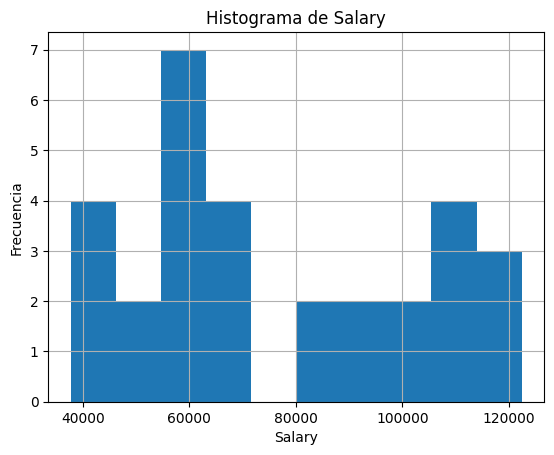

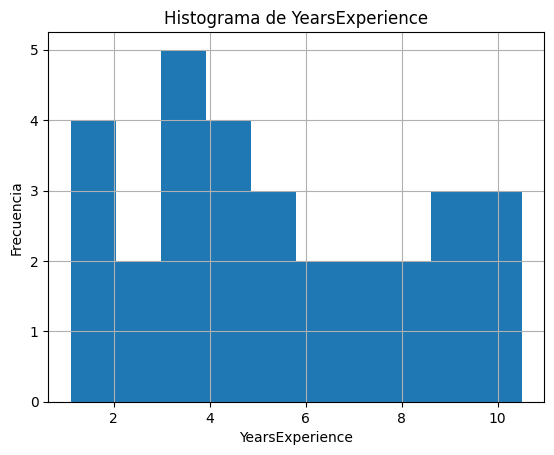

In [7]:
# Histograma de la variable objetivo y del predictor
plt.figure()
df[Y_COL].hist(bins=10)
plt.title(f"Histograma de {Y_COL}")
plt.xlabel(Y_COL)
plt.ylabel("Frecuencia")
plt.show()

plt.figure()
df[X_COL].hist(bins=10)
plt.title(f"Histograma de {X_COL}")
plt.xlabel(X_COL)
plt.ylabel("Frecuencia")
plt.show()

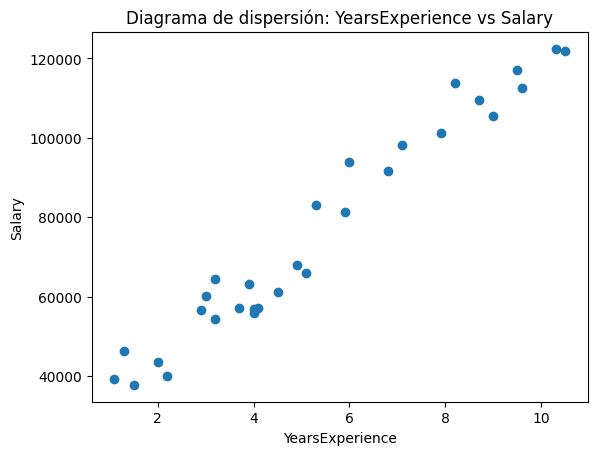

Correlación (Pearson): 0.9782416184887599


In [8]:
# Dispersión Salary vs Experience
plt.figure()
plt.scatter(df[X_COL], df[Y_COL])
plt.title(f"Diagrama de dispersión: {X_COL} vs {Y_COL}")
plt.xlabel(X_COL)
plt.ylabel(Y_COL)
plt.show()

# Correlación simple
corr = np.corrcoef(df[X_COL], df[Y_COL])[0,1]
print("Correlación (Pearson):", corr)

## 2) Regresión Lineal

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

# Train/Test Split
X = df[[X_COL]].values  # 2D
y = df[Y_COL].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predicciones
y_pred = linreg.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación R^2:", r2)

Coeficiente de determinación R^2: 0.9532338376280692


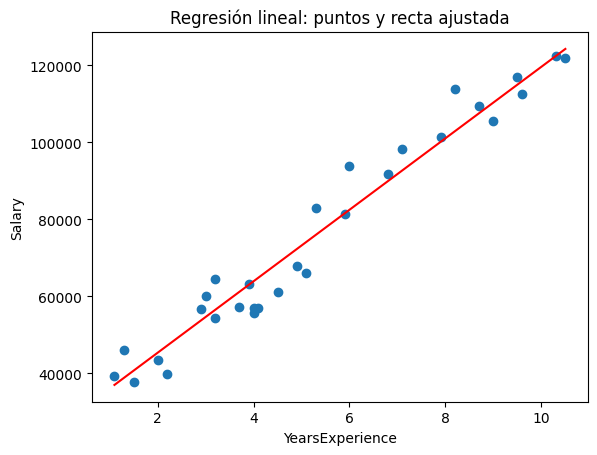

In [16]:
# Visualización: puntos + recta de regresión (en el conjunto completo)
plt.figure()
plt.scatter(X, y)
# Para la recta, generamos un rango ordenado en X
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = linreg.predict(x_line)
plt.plot(x_line, y_line, color="red")
plt.title("Regresión lineal: puntos y recta ajustada")
plt.xlabel(X_COL)
plt.ylabel(Y_COL)
plt.show()

## 3) Preguntas para discusión en clase

1. **¿Qué pasaría si cambiamos el tamaño del test set** (por ejemplo, `test_size=0.4`)?  
2. **¿Y si añadimos ruido/outliers** a algunos puntos de `Salary`? ¿Cómo cambia `R^2` y el gráfico?
3. **¿Cómo afecta a la recta** si medimos la experiencia en meses en vez de años (es decir, multiplicar `X` por 12)?  
4. **¿Podría no ser lineal la relación?**  
5. **¿Qué ocurre si entrenamos con muy pocos datos** (p. ej., `test_size=0.8`)? ¿Son estables las métricas?  
6. **Si quitas el punto con mayor experiencia**, ¿cambia mucho el coeficiente? Explica por qué.  
7. **¿Qué métrica priorizarías** (si tu objetivo es minimizar errores grandes)  
8. **¿Podemos usar esta recta para extrapolar** a 50 años de experiencia? ¿Por qué?
